# Regressão 01 - tarefa 03 - transformações em X e Y

In [ ]:
# importando todas as bibliotecas
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf

Carregue os pacotes necessários e a base de gorjetas.

### I. Modelo no valor da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo em ```tip```, explicada por ```sex, smoker, diner e net_bill```.  
2. Remova as variáveis não significantes.  
3. observe o gráfico de resíduos em função de ```net_bill```  
4. teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.

In [ ]:
# importando o dataset e criando as novas colunas pertinentes
tips = sns.load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


In [ ]:
# criando a matriz utilizando o patsy
y, X = patsy.dmatrices('tip ~ sex + smoker + time + net_bill + 1', tips[:5])
X

DesignMatrix with shape (5, 5)
  Intercept  sex[T.Female]  smoker[T.No]  time[T.Dinner]  net_bill
          1              1             1               1     15.98
          1              0             1               1      8.68
          1              0             1               1     17.51
          1              0             1               1     20.37
          1              1             1               1     20.98
  Terms:
    'Intercept' (column 0)
    'sex' (column 1)
    'smoker' (column 2)
    'time' (column 3)
    'net_bill' (column 4)

In [ ]:
# Verificando o y
y

DesignMatrix with shape (5, 1)
   tip
  1.01
  1.66
  3.50
  3.31
  3.61
  Terms:
    'tip' (column 0)

In [ ]:
# Verificando quais variáveis são insignificantes para o modelo
# Para isso, podemos levar em consideração os valores P>t maiores que 0.5, ou seja, valores de P>t irão ser retiradas do modelo

modelo = sm.OLS(y,X).fit()
modelo.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.717
Model:                            OLS   Adj. R-squared:                  0.434
Method:                 Least Squares   F-statistic:                     2.534
Date:                Sat, 25 Nov 2023   Prob (F-statistic):              0.283
Time:                        03:06:13   Log-Likelihood:                -4.2858
No. Observations:                   5   AIC:                             14.57
Df Residuals:                       2   BIC:                             13.40
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -0.1419      0.530     -0.268      0.814      -2.422       2.138
sex[T.Female]     -1.1330      0.871     -1.300      0.323      -4.882       2.617
smoker[T.No]      -0.1419      0.530     -0.268      0.814      -2.422       2.138
time[T.Dinner]    -0.1419      0.530     -0.268      0.814      -2.422       2.138
net_bill           0.2093      0.097      2.163      0.163      -0.207       0.626
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.103
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.454
Skew:                          -0.120   Prob(JB):                        0.797
Kurtosis:                       1.543   Cond. No.                     1.56e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.23e-36. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

De acordo com o modelo acima, as colunas "smoker" e "Dinner" são insignificantes, por terem um P>t maior que 0.5

In [ ]:
# Retirando os valores insignificantes
y, X = patsy.dmatrices('tip ~ sex + net_bill + 1', tips[:5])
X

DesignMatrix with shape (5, 3)
  Intercept  sex[T.Female]  net_bill
          1              1     15.98
          1              0      8.68
          1              0     17.51
          1              0     20.37
          1              1     20.98
  Terms:
    'Intercept' (column 0)
    'sex' (column 1)
    'net_bill' (column 2)

In [ ]:
modelo = sm.OLS(y,X).fit()
modelo.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.717
Model:                            OLS   Adj. R-squared:                  0.434
Method:                 Least Squares   F-statistic:                     2.534
Date:                Sat, 25 Nov 2023   Prob (F-statistic):              0.283
Time:                        03:06:14   Log-Likelihood:                -4.2858
No. Observations:                   5   AIC:                             14.57
Df Residuals:                       2   BIC:                             13.40
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.4256      1.590     -0.268      0.814      -7.266       6.414
sex[T.Female]    -1.1330      0.871     -1.300      0.323      -4.882       2.617
net_bill          0.2093      0.097      2.163      0.163      -0.207       0.626
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.103
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.454
Skew:                          -0.120   Prob(JB):                        0.797
Kurtosis:                       1.543   Cond. No.                         68.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.327
Method:                 Least Squares   F-statistic:                     60.04
Date:                Sat, 25 Nov 2023   Prob (F-statistic):           6.94e-22
Time:                        03:06:14   Log-Likelihood:                -375.62
No. Observations:                 244   AIC:                             757.2
Df Residuals:                     241   BIC:                             767.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         1.3382      0.185      7.218      0.000       0.973       1.703
sex[T.Female]    -0.0150      0.153     -0.098      0.922      -0.317       0.287
net_bill          0.0992      0.009     10.827      0.000       0.081       0.117
==============================================================================
Omnibus:                       33.672   Durbin-Watson:                   2.124
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.346
Skew:                           0.752   Prob(JB):                     1.30e-13
Kurtosis:                       4.892   Cond. No.                         52.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

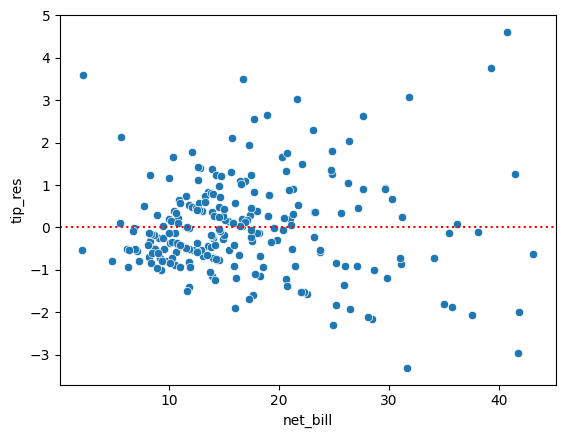

In [ ]:
# Criando uma nova coluna com os residuos
y, X= patsy.dmatrices('tip ~ sex + net_bill', data = tips)
reg = sm.OLS(y,X).fit()
tips['tip_res'] = reg.resid

# Plotando o gráfico dos residuos pelo net bill
sns.scatterplot(x='net_bill', y='tip_res', data=tips)
plt.axhline(y=0, color='r', linestyle=':')

reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.295
Model:                            OLS   Adj. R-squared:                  0.289
Method:                 Least Squares   F-statistic:                     50.30
Date:                Sat, 25 Nov 2023   Prob (F-statistic):           5.54e-19
Time:                        03:06:14   Log-Likelihood:                -382.39
No. Observations:                 244   AIC:                             770.8
Df Residuals:                     241   BIC:                             781.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -1.2400      0.447     -2.772      0.006      -2.121      -0.359
sex[T.Female]       -0.0228      0.158     -0.145      0.885      -0.334       0.288
np.log(net_bill)     1.5661      0.158      9.895      0.000       1.254       1.878
==============================================================================
Omnibus:                       73.433   Durbin-Watson:                   2.046
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              217.929
Skew:                           1.296   Prob(JB):                     4.76e-48
Kurtosis:                       6.836   Cond. No.                         18.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

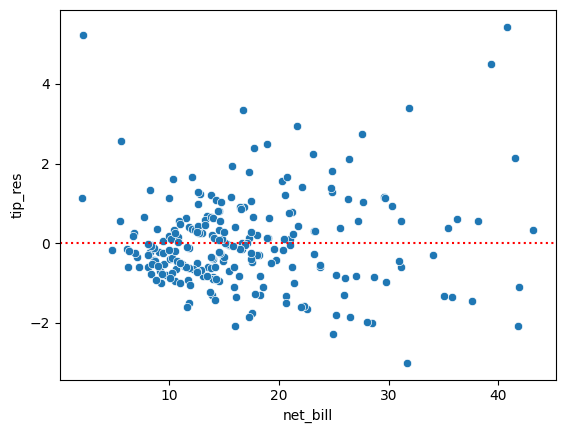

In [ ]:
# Alterando o net_bill para o log e plotando o gráfico
y, X= patsy.dmatrices('tip ~ sex + np.log(net_bill)', data = tips)
reg = sm.OLS(y,X).fit()
tips['tip_res'] = reg.resid
sns.scatterplot(x='net_bill', y='tip_res', data=tips)
plt.axhline(y=0, color='r', linestyle=':')

reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.301
Model:                            OLS   Adj. R-squared:                  0.295
Method:                 Least Squares   F-statistic:                     51.90
Date:                Sat, 25 Nov 2023   Prob (F-statistic):           1.81e-19
Time:                        03:06:14   Log-Likelihood:                -381.26
No. Observations:                 244   AIC:                             768.5
Df Residuals:                     241   BIC:                             779.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 2.2776      0.123     18.523      0.000       2.035       2.520
sex[T.Female]            -0.0501      0.157     -0.320      0.749      -0.359       0.258
np.power(net_bill, 2)     0.0021      0.000     10.053      0.000       0.002       0.003
==============================================================================
Omnibus:                       22.262   Durbin-Watson:                   2.188
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.359
Skew:                           0.615   Prob(JB):                     2.56e-07
Kurtosis:                       4.215   Cond. No.                     1.17e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.17e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

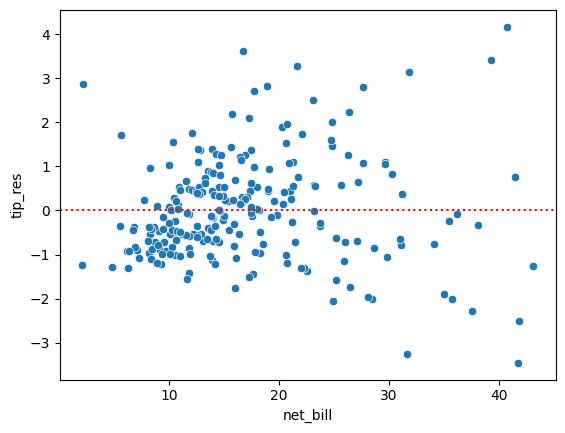

In [ ]:
# Alterando o net_bill para o polinomio e plotando o gráfico
y, X= patsy.dmatrices('tip ~ sex + np.power(net_bill, 2)', data = tips)
reg = sm.OLS(y,X).fit()
tips['tip_res'] = reg.resid
sns.scatterplot(x='net_bill', y='tip_res', data=tips)
plt.axhline(y=0, color='r', linestyle=':')

reg.summary()

Levando em consideração o r-score, o modelo que melhor descreve os dados é o

`reg= smf.ols('tip ~ sex + net_bill', data = tips).fit()` que possui os dados de net_bill sem nenhuma mudança de base. Descrevendo 33% dos nossos dados

### II. Modelo no valor do percentual da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo no log de ```tip```, explicado por ```sex, smoker, diner e net_bill```.
2. Remova as variáveis não significantes.
3. Observe o gráfico de resíduos em função de ```net_bill```
4. Teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.
5. Do modelo final deste item, calcule o $R^2$ na escala de ```tip``` (sem o log). Compare com o modelo do item 1. Qual tem melhor coeficiente de determinação?

In [ ]:
# Gerando a matriz Patsy
y, X = patsy.dmatrices('tip ~ sex + smoker + time + net_bill', data=tips)

In [ ]:
# Verificando a aderencia do modelo
reg = sm.OLS(y, X).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     30.13
Date:                Sat, 25 Nov 2023   Prob (F-statistic):           2.64e-20
Time:                        03:06:15   Log-Likelihood:                -375.13
No. Observations:                 244   AIC:                             760.3
Df Residuals:                     239   BIC:                             777.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.1999      0.242      4.952      0.000       0.723       1.677
sex[T.Female]     -0.0034      0.156     -0.022      0.982      -0.311       0.305
smoker[T.No]       0.1405      0.151      0.932      0.352      -0.156       0.437
time[T.Dinner]     0.0584      0.168      0.347      0.729      -0.273       0.390
net_bill           0.0995      0.009     10.662      0.000       0.081       0.118
==============================================================================
Omnibus:                       36.537   Durbin-Watson:                   2.121
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               65.875
Skew:                           0.800   Prob(JB):                     4.96e-15
Kurtosis:                       4.980   Cond. No.                         71.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**_Verificamos que as variáveis insignificantes são: sex e dinner_**

In [ ]:
# Removendo as variáveis insignificantes
y, X = patsy.dmatrices('tip ~ smoker + net_bill', data=tips)
reg = sm.OLS(y, X).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     60.67
Date:                Sat, 25 Nov 2023   Prob (F-statistic):           4.56e-22
Time:                        03:06:15   Log-Likelihood:                -375.20
No. Observations:                 244   AIC:                             756.4
Df Residuals:                     241   BIC:                             766.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.2318      0.200      6.172      0.000       0.839       1.625
smoker[T.No]     0.1385      0.150      0.923      0.357      -0.157       0.434
net_bill         0.1001      0.009     11.015      0.000       0.082       0.118
==============================================================================
Omnibus:                       37.031   Durbin-Watson:                   2.120
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               66.928
Skew:                           0.809   Prob(JB):                     2.93e-15
Kurtosis:                       4.991   Cond. No.                         57.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

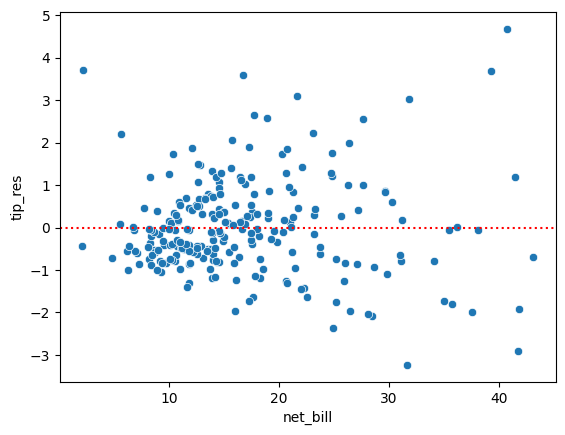

In [ ]:
# Verificando gráfico de resíduos
tips['tip_res'] = reg.resid
sns.scatterplot(x='net_bill', y='tip_res', data=tips)
plt.axhline(y=0, color='r', linestyle=':')

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.295
Model:                            OLS   Adj. R-squared:                  0.289
Method:                 Least Squares   F-statistic:                     50.34
Date:                Sat, 25 Nov 2023   Prob (F-statistic):           5.38e-19
Time:                        03:06:15   Log-Likelihood:                -382.36
No. Observations:                 244   AIC:                             770.7
Df Residuals:                     241   BIC:                             781.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -1.2890      0.445     -2.896      0.004      -2.166      -0.412
smoker[T.No]         0.0433      0.154      0.282      0.779      -0.260       0.347
np.log(net_bill)     1.5712      0.157     10.034      0.000       1.263       1.880
==============================================================================
Omnibus:                       75.168   Durbin-Watson:                   2.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              227.823
Skew:                           1.320   Prob(JB):                     3.38e-50
Kurtosis:                       6.929   Cond. No.                         18.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

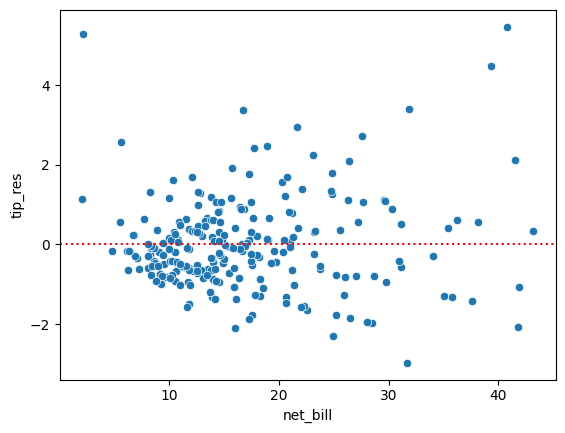

In [ ]:
# Transformando o net_bill em log e verificando o gráfico de dispersão
y, X = patsy.dmatrices('tip ~ smoker + np.log(net_bill)', data=tips)
reg = sm.OLS(y, X).fit()

tips['tip_res'] = reg.resid
sns.scatterplot(x='net_bill', y='tip_res', data=tips)
plt.axhline(y=0, color='r', linestyle=':')

reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.304
Model:                            OLS   Adj. R-squared:                  0.298
Method:                 Least Squares   F-statistic:                     52.69
Date:                Sat, 25 Nov 2023   Prob (F-statistic):           1.04e-19
Time:                        03:06:15   Log-Likelihood:                -380.70
No. Observations:                 244   AIC:                             767.4
Df Residuals:                     241   BIC:                             777.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 2.1421      0.147     14.586      0.000       1.853       2.431
smoker[T.No]              0.1696      0.154      1.102      0.271      -0.133       0.473
np.power(net_bill, 2)     0.0022      0.000     10.265      0.000       0.002       0.003
==============================================================================
Omnibus:                       25.317   Durbin-Watson:                   2.185
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.501
Skew:                           0.672   Prob(JB):                     1.95e-08
Kurtosis:                       4.298   Cond. No.                     1.31e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.31e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

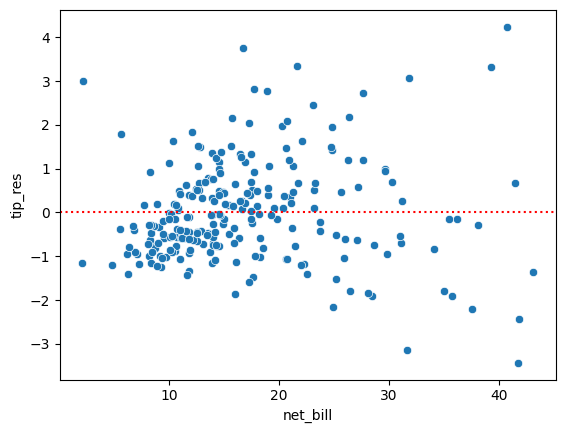

In [ ]:
# Transformando o net_bill em log
y, X = patsy.dmatrices('tip ~ smoker + np.power(net_bill, 2)', data=tips)
reg = sm.OLS(y, X).fit()

tips['tip_res'] = reg.resid
sns.scatterplot(x='net_bill', y='tip_res', data=tips)
plt.axhline(y=0, color='r', linestyle=':')

reg.summary()

Comparando o $R^2$ modelos gerados com a base de net_bill diferente da original, podemos concluir que o modelo que possui uma melhor explicação dos dados é a regressão com os dados na base normal, com um r-score de 33,5%. Sendo:

`y, X = patsy.dmatrices('tip ~ smoker + net_bill', data=tips)`

### III. Previsão de renda

Vamos trabalhar a base que você vai usar no projeto do final deste ciclo.

Carregue a base ```previsao_de_renda.csv```.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

1. Ajuste um modelo de regressão linear simples para explicar ```renda``` como variável resposta, por ```tempo_emprego``` como variável explicativa. Observe que há muitas observações nessa tabela. Utilize os recursos que achar necessário.
2. Faça uma análise de resíduos. Com os recursos vistos neste módulo, como você melhoraria esta regressão?
3. Ajuste um modelo de regressão linear múltipla para explicar ```renda``` (ou uma transformação de ```renda```) de acordo com as demais variáveis.
4. Remova as variáveis não significantes e ajuste novamente o modelo. Interprete os parâmetros
5. Faça uma análise de resíduos. Avalie a qualidade do ajuste.

In [ ]:
# Carregando a base de dados
df = pd.read_csv('previsao_de_renda.csv')

In [ ]:
# Verificando as variáveis explicativas
df.columns

Index(['Unnamed: 0', 'data_ref', 'id_cliente', 'sexo', 'posse_de_veiculo',
       'posse_de_imovel', 'qtd_filhos', 'tipo_renda', 'educacao',
       'estado_civil', 'tipo_residencia', 'idade', 'tempo_emprego',
       'qt_pessoas_residencia', 'renda'],
      dtype='object')

In [ ]:
# Gerando o modelo simples e verificando os dados
mod = smf.ols('renda ~ tempo_emprego', data=df).fit()
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.148
Method:                 Least Squares   F-statistic:                     2162.
Date:                Sat, 25 Nov 2023   Prob (F-statistic):               0.00
Time:                        03:21:22   Log-Likelihood:            -1.2963e+05
No. Observations:               12427   AIC:                         2.593e+05
Df Residuals:                   12425   BIC:                         2.593e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2177.9041    112.212     19.409      0.000    1957.951    2397.857
tempo_emprego   510.0119     10.968     46.501      0.000     488.513     531.510
==============================================================================
Omnibus:                    17028.827   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          7679294.474
Skew:                           7.717   Prob(JB):                         0.00
Kurtosis:                     123.800   Cond. No.                         15.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Temos um valor de $R^2$ muito baixo neste modelo, devido a isso, iremos testar outras variáveis

In [ ]:
# testando predizer renda utilizando tempo_emprego qtd_filhos e qt_pessoas_residencia
mod = smf.ols('renda ~ tempo_emprego + qtd_filhos + qt_pessoas_residencia', data=df).fit()
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     737.1
Date:                Sat, 25 Nov 2023   Prob (F-statistic):               0.00
Time:                        03:44:17   Log-Likelihood:            -1.2961e+05
No. Observations:               12427   AIC:                         2.592e+05
Df Residuals:                   12423   BIC:                         2.593e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept               208.0623    342.758      0.607      0.544    -463.797     879.922
tempo_emprego           513.4807     10.974     46.790      0.000     491.969     534.992
qtd_filhos             -798.0087    216.263     -3.690      0.000   -1221.918    -374.099
qt_pessoas_residencia  1021.4093    181.460      5.629      0.000     665.720    1377.099
==============================================================================
Omnibus:                    17024.050   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          7692061.838
Skew:                           7.712   Prob(JB):                         0.00
Kurtosis:                     123.903   Cond. No.                         60.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

No modelo acima pordemos verificar que existem outras variáveis significativas que ajudam a descrever a renda, porém, ainda assim o $R^2$ é menor que 20%

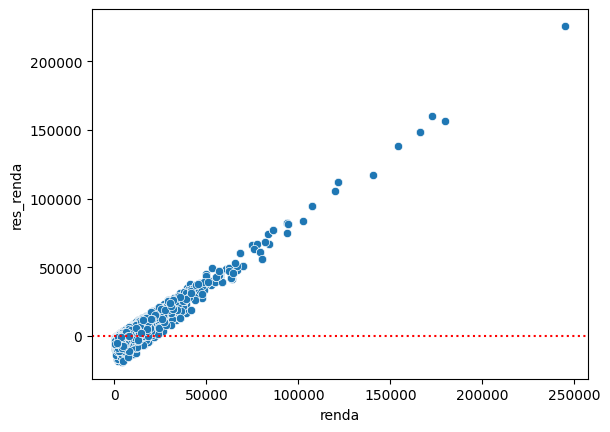

In [ ]:
# verificando os resíduos do modelo acima
df['res_renda'] = mod.resid
sns.scatterplot(x='renda', y='res_renda', data=df)
plt.axhline(y=0, color='r', linestyle=':')

Como já era de se esperar devido ao $R^2$ possuir um valor baixo, há uma grande dispersão dos dados, tendo um modelo com uma dispersão não ajustada

In [ ]:
# Fazendo mais alguns testes com outras variáveis no modelo
mod = smf.ols('renda ~ tempo_emprego + idade + qt_pessoas_residencia + qtd_filhos + posse_de_imovel', data=df).fit()
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     443.0
Date:                Sat, 25 Nov 2023   Prob (F-statistic):               0.00
Time:                        03:44:38   Log-Likelihood:            -1.2961e+05
No. Observations:               12427   AIC:                         2.592e+05
Df Residuals:                   12421   BIC:                         2.593e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                -325.4176    483.295     -0.673      0.501   -1272.752     621.916
posse_de_imovel[T.True]   201.2158    155.207      1.296      0.195    -103.014     505.446
tempo_emprego             508.9321     11.574     43.972      0.000     486.245     531.619
idade                      10.3208      8.637      1.195      0.232      -6.608      27.250
qt_pessoas_residencia    1022.2721    181.453      5.634      0.000     666.596    1377.949
qtd_filhos               -767.9813    217.985     -3.523      0.000   -1195.266    -340.696
==============================================================================
Omnibus:                    17026.746   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          7702608.488
Skew:                           7.714   Prob(JB):                         0.00
Kurtosis:                     123.987   Cond. No.                         298.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

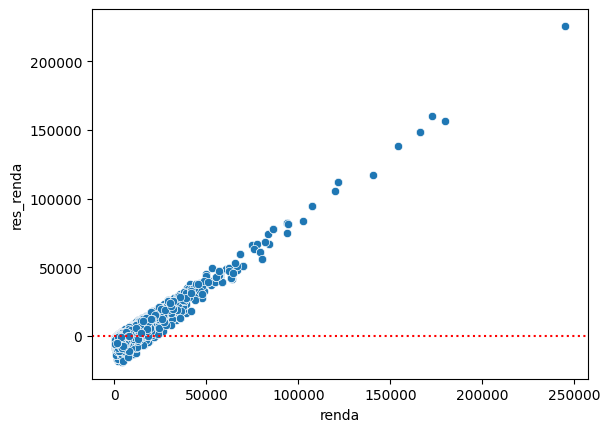

In [ ]:
# Visualizando os residuos
df['res_renda'] = mod.resid
sns.scatterplot(x='renda', y='res_renda', data=df)
plt.axhline(y=0, color='r', linestyle=':')

Novamente os resíduos se mostram muito concentrados, o que mostra que não é um modelo com bpa descrição